# Regresión Logística para predicciones bancarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
data = pd.read_csv("../datasets/bank/bank.csv",sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
data.shape

(4119, 21)

In [4]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [5]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [6]:
data["y"] = (data["y"]=="yes").astype(float)

In [7]:
data.education.unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [8]:
data["education"] = np.where((data.education=="basic.4y")|(data.education=="basic.6y")|(data.education=="basic.9y"),"Basic",data.education)
data["education"] = np.where((data.education=="high.school"),"High School",data.education)
data["education"] = np.where((data.education=="university.degree"),"University Degree",data.education)
data["education"] = np.where((data.education=="professional.course"),"Professional Course",data.education)
data["education"] = np.where((data.education=="unkown"),"Unknown",data.education)
data["education"] = np.where((data.education=="illiterate"),"Illiterate",data.education)

In [9]:
data.education.unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'unknown', 'Illiterate'], dtype=object)

In [10]:
data.y.value_counts()

0.0    3668
1.0     451
Name: y, dtype: int64

In [11]:
data.groupby(["y"]).describe()

age                                                     duration  \
      count       mean        std   min   25%   50%   75%   max    count   
y                                                                          
0.0  3668.0  39.895311   9.865468  18.0  32.0  38.0  47.0  88.0   3668.0   
1.0   451.0  41.889135  13.292977  18.0  31.0  39.0  51.0  86.0    451.0   

                ... euribor3m        nr.employed                          \
          mean  ...       75%    max       count         mean        std   
y               ...                                                        
0.0  219.40976  ...     4.962  5.045      3668.0  5175.502072  65.906049   
1.0  560.78714  ...     4.855  4.970       451.0  5093.118625  90.607987   

                                             
        min     25%     50%     75%     max  
y                                            
0.0  4963.6  5099.1  5195.8  5228.1  5228.1  
1.0  4963.6  5008.7  5076.2  5191.0  5228.1  

[2 rows x 80 columns]

In [12]:
data.groupby(["y"]).mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0.0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1.0,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [13]:
data.groupby(["education"]).mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


In [14]:
data.education.value_counts()

University Degree      1264
Basic                  1231
High School             921
Professional Course     535
unknown                 167
Illiterate                1
Name: education, dtype: int64

In [15]:
cross = pd.crosstab(data.education,data.y)
cross

y,0.0,1.0
education,,
Basic,1133,98
High School,824,97
Illiterate,1,0
Professional Course,470,65
University Degree,1099,165
unknown,141,26


In [16]:
rows =cross.divide(np.sum(cross,axis=1),axis=0)
rows

y,0.0,1.0
education,,
Basic,0.920390,0.079610
High School,0.894680,0.105320
Illiterate,1.000000,0.000000
Professional Course,0.878505,0.121495
University Degree,0.869462,0.130538
unknown,0.844311,0.155689


<Figure size 1600x900 with 0 Axes>

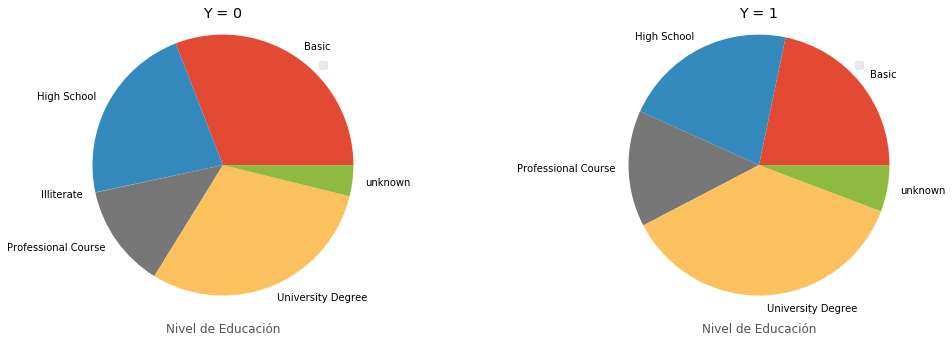

In [17]:
style.use("ggplot")
plt.figure(figsize=(16,9),dpi=100)
subplot1,subplot2 = pd.crosstab(data.education,data.y).plot(kind="pie",subplots=True,radius=1.5)
subplot1.set_title("Y = 0\n\n")
subplot2.set_title("Y = 1\n\n")
subplot1.set_xlabel("\n\n\nNivel de Educación")
subplot2.set_xlabel("\n\n\nNivel de Educación")
plt.subplots_adjust(right=2.4)
subplot1.legend([])
subplot2.legend([])
plt.show()
# - 'line' : line plot (default)
# - 'bar' : vertical bar plot
# - 'barh' : horizontal bar plot
# - 'hist' : histogram
# - 'box' : boxplot
# - 'kde' : Kernel Density Estimation plot
# - 'density' : same as 'kde'
# - 'area' : area plot
# - 'pie' : pie plot

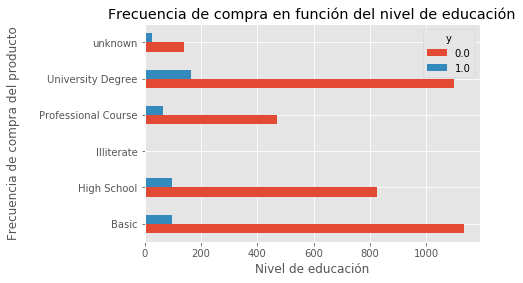

In [18]:
pd.crosstab(data.education, data.y).plot(kind="barh")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto\n")
plt.show()

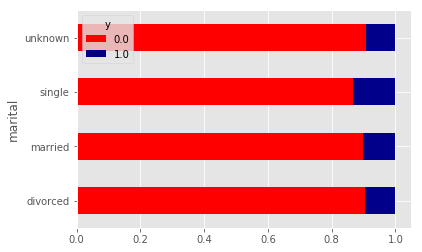

In [19]:
table = pd.crosstab(data.marital,data.y)
table.div(table.sum(1),axis=0).plot(kind="barh",stacked=True,color=["red","darkblue"])
plt.show()

In [20]:
data.marital.value_counts()

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64

In [21]:
table

y,0.0,1.0
marital,,
divorced,403,43
married,2257,252
single,998,155
unknown,10,1


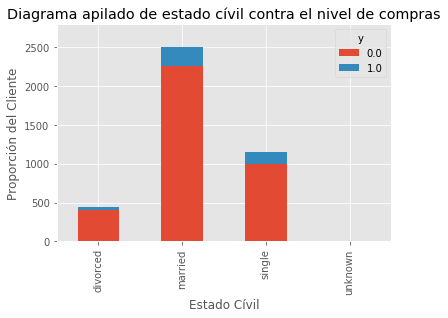

In [22]:
table.plot(kind="bar",stacked=True)
plt.ylim([0,2800])
plt.title("Diagrama apilado de estado cívil contra el nivel de compras")
plt.xlabel("Estado Cívil")
plt.ylabel("Proporción del Cliente")
plt.show()

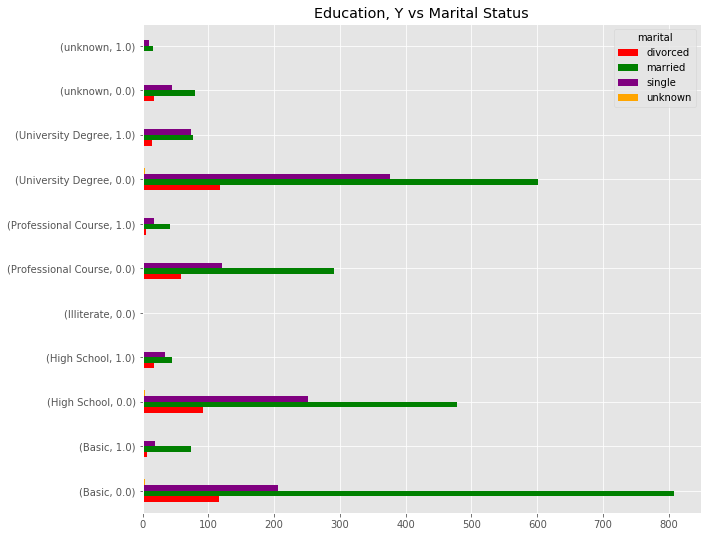

In [23]:
pd.crosstab([data.education,data.y],data.marital).plot(kind="barh",color=["red","green","purple","orange","blue"],figsize=(10,9),
                                                      legend=True,grid=True,title= "Education, Y vs Marital Status")
plt.ylabel(None)
# data, x, y, kind, ax, subplots, sharex, sharey, layout, figsize
# use_index, title, grid, legend, style, logx, logy, loglog, xticks
#yticks, xlim, ylim, rot, fontsize, colormap, table, yerr, xerr, secondary_y, sort_columns, **kwds)

plt.show()

Text(0, 0.5, 'Frecuencia de compra del producto')

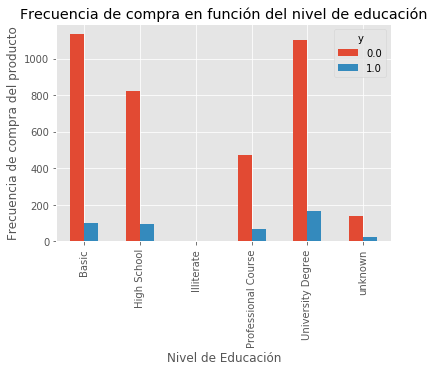

In [24]:
%matplotlib inline
pd.crosstab(data.education,data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de Educación")
plt.ylabel("Frecuencia de compra del producto")

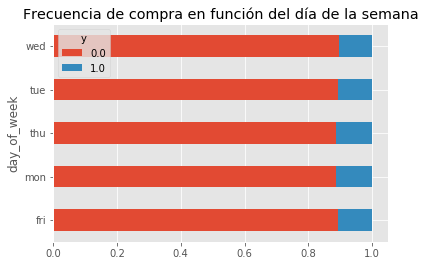

In [25]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1),axis=0).plot(kind="barh",stacked=True)
plt.title("Frecuencia de compra en función del día de la semana")
plt.show()

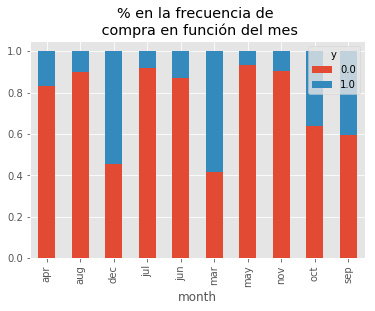

In [26]:
table = pd.crosstab(data.month,data.y)
table.div(table.sum(1),axis=0).plot(kind="bar",stacked=True)
plt.title("% en la frecuencia de \n compra en función del mes")
plt.show()

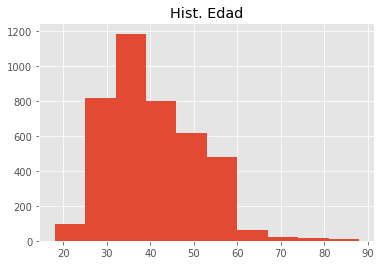

In [27]:
fig,ax = plt.subplots(1,1)
ax.hist(data.age)
ax.set_title("Hist. Edad")
plt.show()

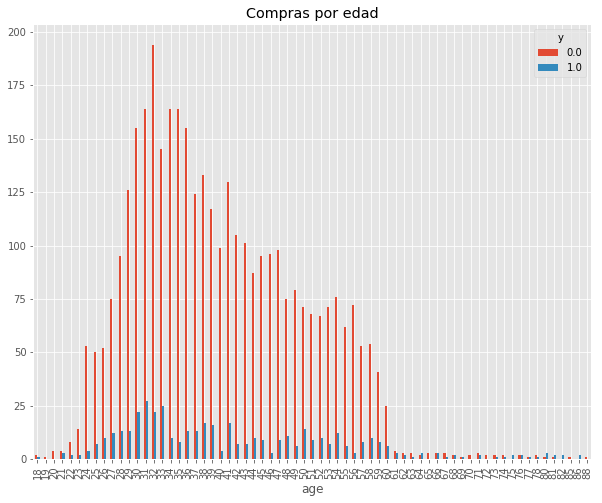

In [28]:
pd.crosstab(data.age,data.y).plot(kind="bar",figsize=(10,8))
plt.title("Compras por edad")
plt.show()

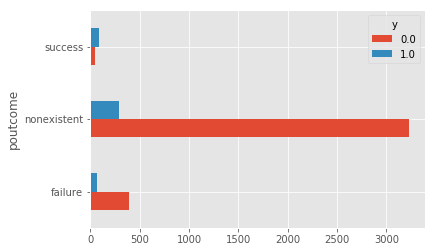

In [29]:
pd.crosstab(data.poutcome,data.y).plot(kind="barh")
plt.show()

### Conversión de las variables categoricas a dummies

In [30]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0.0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0.0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0.0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0.0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0.0


In [31]:
categories = ["job","marital","education","housing","loan","contact","month","day_of_week","poutcome"]
for k in categories:
    print(k)
    print(data[k].value_counts())
    print("------------------")

job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64
------------------
marital
married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64
------------------
education
University Degree      1264
Basic                  1231
High School             921
Professional Course     535
unknown                 167
Illiterate                1
Name: education, dtype: int64
------------------
housing
yes        2175
no         1839
unknown     105
Name: housing, dtype: int64
------------------
loan
no         3349
yes         665
unknown     105
Name: loan, dtype: int64
------------------
contact
cellular     2652
telephone    1467
Name: contact, dtype: int64
------------------
month
may    1378
jul     711
aug     636
jun   

In [32]:
categories

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [33]:
data_new = data.copy()
for k in categories:
    dummy = pd.get_dummies(data[k],prefix=k)
    data_new = data_new.join(dummy)

In [34]:
data_new.columns.values.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Illiterate',
 'education_Professional Course',
 'education_University Degree',
 'education_unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 '

In [35]:
categories.append("default")

In [36]:
categories

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'default']

In [37]:
data_new = data_new.drop(categories,axis=1)
data_new.columns.values.tolist()

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Illiterate',
 'education_Professional Course',
 'education_University Degree',
 'education_unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',

In [38]:
len(data_new.columns.values.tolist())

59

In [39]:
data_new.shape

(4119, 59)

In [40]:
Y = data_new["y"]
X = data_new.drop("y",axis=1)

In [41]:
X.shape

(4119, 58)

### Selección de rasgos para el modelo

In [42]:
n = 12

In [43]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression() 

In [45]:
import warnings
warnings.filterwarnings("ignore")
rfe = RFE(lr,n)
rfe.fit(X,Y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=12, step=1, verbose=0)

In [46]:
len(rfe.support_),rfe.support_

(58, array([False, False, False, False,  True, False, False, False,  True,
        False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True,  True,
         True,  True, False,  True, False, False, False, False, False,
        False,  True, False,  True]))

In [47]:
X_X = data_new.iloc[:,rfe.support_]
X_X.head()

,previous,euribor3m,job_blue-collar,job_retired,month_aug,month_dec,month_jul,month_jun,month_mar,month_nov,day_of_week_wed,poutcome_nonexistent
0,0,1.313,1,0,0,0,0,0,0,0,0,1
1,0,4.855,0,0,0,0,0,0,0,0,0,1
2,0,4.962,0,0,0,0,0,1,0,0,1,1
3,0,4.959,0,0,0,0,0,1,0,0,0,1
4,0,4.191,0,0,0,0,0,0,0,1,0,1


In [48]:
rfe.ranking_

array([34, 41, 18, 42,  1, 14, 27, 25,  1, 38, 22,  3,  1, 35,  2, 36,  1,
        5, 30, 33, 12, 45, 19, 40, 31, 47, 26, 13, 46, 21, 32,  8, 20,  6,
       10, 15,  9, 23, 16,  4, 43, 24,  1,  1,  1,  1,  1, 17,  1, 44, 37,
       28, 39, 29, 11,  1,  7,  1])

In [49]:
list(zip(data_new.columns.values.tolist(),rfe.ranking_,rfe.support_))

[('age', 34, False),
 ('duration', 41, False),
 ('campaign', 18, False),
 ('pdays', 42, False),
 ('previous', 1, True),
 ('emp.var.rate', 14, False),
 ('cons.price.idx', 27, False),
 ('cons.conf.idx', 25, False),
 ('euribor3m', 1, True),
 ('nr.employed', 38, False),
 ('y', 22, False),
 ('job_admin.', 3, False),
 ('job_blue-collar', 1, True),
 ('job_entrepreneur', 35, False),
 ('job_housemaid', 2, False),
 ('job_management', 36, False),
 ('job_retired', 1, True),
 ('job_self-employed', 5, False),
 ('job_services', 30, False),
 ('job_student', 33, False),
 ('job_technician', 12, False),
 ('job_unemployed', 45, False),
 ('job_unknown', 19, False),
 ('marital_divorced', 40, False),
 ('marital_married', 31, False),
 ('marital_single', 47, False),
 ('marital_unknown', 26, False),
 ('education_Basic', 13, False),
 ('education_High School', 46, False),
 ('education_Illiterate', 21, False),
 ('education_Professional Course', 32, False),
 ('education_University Degree', 8, False),
 ('education_u

In [50]:
rfe.score(X,Y),rfe.get_params()

(0.9021607186210245,
 {'estimator__C': 1.0,
  'estimator__class_weight': None,
  'estimator__dual': False,
  'estimator__fit_intercept': True,
  'estimator__intercept_scaling': 1,
  'estimator__max_iter': 100,
  'estimator__multi_class': 'warn',
  'estimator__n_jobs': None,
  'estimator__penalty': 'l2',
  'estimator__random_state': None,
  'estimator__solver': 'warn',
  'estimator__tol': 0.0001,
  'estimator__verbose': 0,
  'estimator__warm_start': False,
  'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False),
  'n_features_to_select': 12,
  'step': 1,
  'verbose': 0})

In [51]:
scores = []
variables = []
for k in range(1,20):
    lm = LogisticRegression()
    rfe = RFE(lm,k)
    rfe.fit(X,Y) 
    variables.append(X.columns.values[rfe.support_])
    scores.append(rfe.score(X,Y))

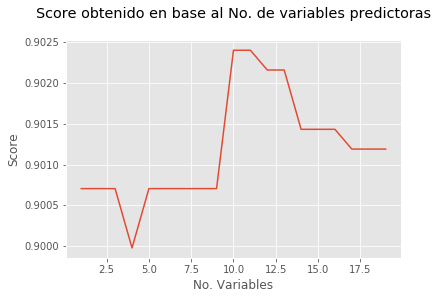

In [52]:
plt.plot(np.arange(1,20),scores)
plt.title("Score obtenido en base al No. de variables predictoras\n")
plt.xlabel("No. Variables")
plt.ylabel("Score")
plt.show()

### Implementación del moedelo con statsmodels.api

In [53]:
import statsmodels.api as sm

In [54]:
Y = data_new["y"]
X = data_new.iloc[:,rfe.support_]

In [55]:
logit_model = sm.Logit(Y,X)
result = logit_model.fit()
result

Optimization terminated successfully.
         Current function value: 0.277310
         Iterations 7


In [56]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4100
Method:                           MLE   Df Model:                           18
Date:                Sat, 31 Aug 2019   Pseudo R-squ.:                  0.1973
Time:                        02:47:34   Log-Likelihood:                -1142.2
converged:                       True   LL-Null:                       -1422.9
                                        LLR p-value:                1.242e-107
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
previous                        0.3200      0.111      2.872      0.004       0.102       0.538
euribor3m                      -0.4972      0.043    -11.620      0.000      -0.581      -0.413
job_admin.                      0.1230      0.137      0.895      0.371      -0.146       0.392
job_blue-collar                -0.3130      0.168     -1.866      0.062      -0.642       0.016
job_housemaid                   0.0688      0.361      0.191      0.849      -0.638       0.776
job_retired                     0.3637      0.230      1.580      0.114      -0.087       0.815
job_self-employed              -0.4276      0.333     -1.284      0.199      -1.080       0.225
education_University Degree     0.0291      0.130      0.223      0.824      -0.227       0.285
housing_no                      0.1455      0.111      1.306      0.192      -0.073       0.364
contact_cellular                0.2453      0.152      1.614      0.107      -0.053       0.543
month_aug                       0.4325      0.192      2.247      0.025       0.055       0.810
month_dec                       1.3850      0.475      2.917      0.004       0.454       2.316
month_jul                       0.7846      0.204      3.843      0.000       0.384       1.185
month_jun                       1.0424      0.182      5.733      0.000       0.686       1.399
month_mar                       1.7931      0.325      5.517      0.000       1.156       2.430
month_nov                       0.2690      0.212      1.270      0.204      -0.146       0.684
day_of_week_wed                 0.1087      0.142      0.765      0.444      -0.170       0.387
poutcome_failure               -2.0231      0.213     -9.506      0.000      -2.440      -1.606
poutcome_nonexistent           -1.3602      0.195     -6.985      0.000      -1.742      -0.979
===============================================================================================
"""

### Implementación con sklearn

In [57]:
from sklearn.linear_model import LogisticRegression
from IPython.display import display, Math, Latex

In [58]:
Y = data_new["y"]
X = data_new.drop("y",axis=1)
logit_model = LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
X.shape

(4119, 58)

In [60]:
logit_model.score(X,Y)

0.9150279193979121

In [61]:
1-Y.mean() #Sin crear modelo, predecir 0 nos hubiese dado

0.8905074047098811

**Nuestro modelo predice mejor, pero su eficiencia por encima del promedio en muy baja**

In [62]:
logit_model.coef_, logit_model.intercept_

(array([[ 3.52249787e-03,  5.09255124e-03, -7.75716034e-02,
         -1.45767698e-03,  1.26883618e-02, -2.29525509e-01,
          3.11796840e-01,  5.95671649e-02, -2.76884602e-01,
         -5.57768648e-03,  2.48939062e-02, -4.26979068e-02,
         -1.54247257e-02,  3.41720916e-03, -1.43842768e-02,
          5.33214125e-03, -1.55750078e-02,  5.08046662e-03,
          6.38126106e-03,  3.23116605e-02,  1.45661538e-02,
         -7.70893760e-04, -1.48477919e-02, -2.93090181e-02,
          4.72371012e-02,  4.96966078e-05, -4.31297387e-02,
         -1.15704233e-02, -3.85295672e-04,  4.86985353e-03,
          4.58950774e-02,  7.45051448e-03,  1.15931133e-02,
         -6.81073398e-03, -1.65239150e-03,  1.56508115e-02,
         -6.81073398e-03, -5.71008970e-03,  7.72952147e-02,
         -7.41652269e-02, -1.18507783e-03,  2.16845570e-02,
          9.52179133e-03,  1.48817029e-02,  6.69458913e-02,
          4.63470416e-02, -1.39377830e-01, -2.59292350e-02,
          1.09810112e-02, -7.39864624e-0

In [63]:
pd.DataFrame(list(zip(X.columns.values,logit_model.coef_.T)))

,0,1
0,age,[0.003522497865045111]
1,duration,[0.005092551237120461]
2,campaign,[-0.07757160344571366]
3,pdays,[-0.0014576769818140927]
4,previous,[0.012688361782575888]
5,emp.var.rate,[-0.22952550918161896]
6,cons.price.idx,[0.3117968397386395]
7,cons.conf.idx,[0.059567164903665266]
8,euribor3m,[-0.27688460236315693]
9,nr.employed,[-0.005577686477164249]


**Las que más influyen son los meses (marzo, dec,jun,jul,ag) y si cambia el euribor eso indíca que la probabilidad bajará.**

### Validación del modelo Logístico

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X.shape,Y.shape

((4119, 58), (4119,))

In [66]:
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.30,random_state=0)

In [67]:
len(x_train)/(len(x_train)+len(x_test))

0.6999271667880553

In [68]:
lm = LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
result = lm.predict(x_test) # Cero = No compra, Uno = compra
probs = lm.predict_proba(x_test)
result

array([0., 0., 0., ..., 0., 0., 0.])

In [70]:
probs # Si es >0.5 compra y <0.5 No compra

array([[0.99321329, 0.00678671],
       [0.81546931, 0.18453069],
       [0.96051412, 0.03948588],
       ...,
       [0.60687777, 0.39312223],
       [0.97984977, 0.02015023],
       [0.63003393, 0.36996607]])

In [71]:
probs.shape

(1236, 2)

In [72]:
lm.score(x_train,y_train)

0.9240374609781478

In [73]:
lm.score(x_test,y_test) # Mejor resultado en el test

0.9045307443365695

In [74]:
display(Math(r"\epsilon \in (0,1), Y_p = \begin{cases}0 & si\  p \le \epsilon \\ 1 & si\ p \ge\epsilon \end{cases}"))

<IPython.core.display.Math object>

##### Con 0.5 de prob

In [75]:
probabilidad = probs[:,1]
probs_df = pd.DataFrame(probabilidad)
thereshold = 0.5 # 
probs_df["Prediction"] = np.where(probs_df[0]>thereshold,1,0)
probs_df.head()

,0,Prediction
0,0.006787,0
1,0.184531,0
2,0.039486,0
3,0.081037,0
4,0.018298,0


In [76]:
Y_real = pd.DataFrame(pd.DataFrame(Y[y_test.index.values.tolist()]).values)
Y_Prediction = probs_df.Prediction
Y_total = pd.concat([Y_real.astype(float),Y_Prediction.astype(float)],axis=1)
Y_total.head()

,0,Prediction
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [77]:
probs_df["Prediction"].mean()

0.07119741100323625

In [78]:
pd.crosstab(probs_df["Prediction"],columns="count")

col_0,count
Prediction,
0,1148
1,88


In [79]:
# Acertados con el test
table = pd.crosstab(Y_total[0],Y_total.Prediction)
table

Prediction,0.0,1.0
0,,
0.0,1072,42
1.0,76,46


In [80]:
table.div(table.sum(0),axis=1) # Predicciones acertadas

Prediction,0.0,1.0
0,,
0.0,0.933798,0.477273
1.0,0.066202,0.522727


In [81]:
(1099+14)/(1099+15+108+14)

0.9004854368932039

### Con thereshold=0.1

In [82]:
probabilidad = probs[:,1]
probs_dff = pd.DataFrame(probabilidad)
thereshold = 0.1 # Recordar que y.mean()=0.11
probs_dff["Prediction"] = np.where(probs_df[0]>thereshold,1,0)
probs_dff.head()

,0,Prediction
0,0.006787,0
1,0.184531,1
2,0.039486,0
3,0.081037,0
4,0.018298,0


In [83]:
Y_real = pd.DataFrame(pd.DataFrame(Y[y_test.index.values.tolist()]).values)
Y_Prediction = probs_dff.Prediction
Y_total = pd.concat([Y_real.astype(float),Y_Prediction.astype(float)],axis=1)
Y_total.head()

,0,Prediction
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [84]:
# Acertados con el test
table = pd.crosstab(Y_total[0],Y_total.Prediction)
table

Prediction,0.0,1.0
0,,
0.0,913,201
1.0,14,108


In [85]:
(806+82)/(806+308+40+82)

0.7184466019417476

In [86]:
table.div(table.sum(0),axis=1) # Predicciones acertadas

Prediction,0.0,1.0
0,,
0.0,0.984898,0.650485
1.0,0.015102,0.349515


In [87]:
(239+8)/(239+8+2+99) # Clasifica peor

0.7097701149425287

In [88]:
count = pd.crosstab(probs_df.Prediction,columns="count")
count

col_0,count
Prediction,
0,1148
1,88


In [89]:
390/probs_df.shape[0]*100

31.55339805825243

**Dice que el 31% comprará, por lo tanto, se propone un nuevo Therehold (Podemos aprecir que con un threshold de 0.50 conseguimos un mejor resultado, pero no una mejora en el modelo, pues apenas y mejoró decimas porcentuales)**

In [90]:
from sklearn import metrics

In [91]:
metrics.accuracy_score(y_test,result)

0.9045307443365695

In [92]:
metrics.recall_score(y_test,result)

0.3770491803278688

In [93]:
metrics.precision_score(y_test,result)

0.5227272727272727

### Validación Cruzada

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS

In [95]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [96]:
scores = cross_val_score(LogisticRegression(),X,Y,scoring="accuracy",cv= 12,n_jobs=-1)
scores

array([0.91569767, 0.91569767, 0.90988372, 0.9127907 , 0.92151163,
       0.91569767, 0.92151163, 0.90379009, 0.90935673, 0.92397661,
       0.92105263, 0.90643275])

In [97]:
scores_mean = [scores.mean()]
scores_mean

[0.9147832915490222]

In [98]:
posicion = [0]
for k in range(3,100):
    scores1 = cross_val_score(LogisticRegression(),X,Y,scoring="accuracy",cv=k,n_jobs=-1)
    scores1 =  scores1.mean()
    if scores1>scores_mean[0]:
        del scores_mean[0]
        scores_mean.append(scores1)
        posicion[0]=k

In [99]:
scores_mean,posicion

([0.9160051244451174], [34])

### Matrices de Confusión


    
|<center>Actual/Predicción |<center>        Es Positivo          |<center>      Es Negativo         |
|--------------------------|-----------------------------------  |----------------------------------| 
|$\space$                  |<center>**Verdadero Positivo(TP)**   |<center>**Falso Negativo(FN)**    |
|<center>Ha dado           |<center>Predicción correcta del po-  |<center>Predicción incorrecta.    |
|<center>Positiva          |<center>sitivo. Era positivo y la    |<center>Era negativo y la pre-    |
|    <center>              |<center>predicción ha sido positiva. |<center>dicción ha sido Positiva. |
|--------------------------|-----------------------------------  |----------------------------------|
|$\space$                  |<center>**Falso Positivo(FP)**       |<center>**Verdadero Negativo(VN)**|
|<center>Ha dado           |<center>Predicción incorrecta del    |<center>Predicción correcta.      |
|<center>Negativo          |<center>positivo. Era positivo y la  |<center>Era negativo y la pre-    |
|    <center>              |<center>predicción ha sido negativo. |<center>dicción ha sido Negativa. |
    
    
* Número de positivos reales: TP+FN
* Número de negativos reales: TN+FP
* Número de predicciones correctas: TP + TN
* Número de predicciones incorrectas: FP+FN
* Sensibilidad(TPR) = $\frac{TP}{TP+FN}$
* Especififaf(TNR) = $\frac{TN}{TN+FP}$



### Curvas ROC ( Característica OPerativa del Receptor ) 

Es una representación gráfica de la sensibilidad frente a la especificidad para un sistema clasificador binario según se varía el umbral de discriminación. Otra interpretación de este gráfico es la representación de la razón o ratio de verdaderos positivos (VPR = Razón de Verdaderos Positivos) frente a la razón o ratio de falsos positivos (FPR = Razón de Falsos Positivos) también según se varía el umbral de discriminación (valor a partir del cual decidimos que un caso es un positivo). ROC también puede significar Relative Operating Characteristic (Característica Operativa Relativa) porque es una comparación de dos características operativas (VPR y FPR) según cambiamos el umbral para la decisión.

* La curva ROC representa FPR (r-Especifidad vs TPR Sensibilidad.
* Incrementar la sensibilidad, hará bajar la especifidad.
* Cuanto mejor se ajuste la curva al borde superior izquierdo, mejor es la predicción del modelo. 
* Cuanto más cerca se encuentre de la diagional, peor es el modelo. 
* Cuanto mayor sea el área bajo la curva, mejor será la predicción.

![imagen.jpg](https://scielo.conicyt.cl/fbpe/img/rci/v29n2/fig03-02.jpg)

In [100]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [101]:
lm = LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [102]:
probs = lm.predict_proba(x_test) #The returned estimates for all classes are ordered by the
# label of classes.
probs, lm.classes_

(array([[0.99321329, 0.00678671],
        [0.81546931, 0.18453069],
        [0.96051412, 0.03948588],
        ...,
        [0.60687777, 0.39312223],
        [0.97984977, 0.02015023],
        [0.63003393, 0.36996607]]), array([0., 1.]))

In [103]:
prob = probs[:,1]
thereshold = 0.1
clase = pd.DataFrame(np.where(prob>=thereshold,1,0))
comparar = pd.concat([pd.DataFrame(prob),clase,pd.DataFrame(y_test.values)],axis=1)
comparar.columns = ["Prob","Predicción","Verdadero"]
comparar.head()

,Prob,Predicción,Verdadero
0,0.006787,0,0.0
1,0.184531,1,0.0
2,0.039486,0,0.0
3,0.081037,0,0.0
4,0.018298,0,0.0


In [104]:
comparar.shape,prob.shape

((1236, 3), (1236,))

In [105]:
matrix_confusion = pd.crosstab(comparar.Verdadero,comparar["Predicción"],margins=True)

In [106]:
matrix_confusion

Predicción,0,1,All
Verdadero,,,
0.0,913,201,1114
1.0,14,108,122
All,927,309,1236


In [107]:
porcen = pd.crosstab(comparar.Verdadero,comparar["Predicción"])
porcen.div(porcen.sum(1),axis=0)

Predicción,0,1
Verdadero,,
0.0,0.819569,0.180431
1.0,0.114754,0.885246


In [108]:
TP = matrix_confusion[1][1]
TN = matrix_confusion[0][0]
FP = matrix_confusion[1][0]
FN = matrix_confusion[0][1]

In [109]:
sensi = TP/(TP+FN)
sensi

0.8852459016393442

In [110]:
esp = 1-TN/(TN+FP)
esp

0.18043087971274685

In [111]:
thereshold = [0.04,0.05,0.07,0.1,0.15,0.2,0.25]
sens = [1]
esp = [1]
for i in thereshold:
    comparar["Predicción"] = np.where(prob>=i,1,0)
    comparar.head()
    mat_conf = pd.crosstab(comparar.Verdadero,comparar["Predicción"],margins=True)
    matrix_confusion = mat_conf
    TP = matrix_confusion[1][1]
    TN = matrix_confusion[0][0]
    FP = matrix_confusion[1][0]
    FN = matrix_confusion[0][1]
    
    sensi = TP/(TP+FN)
    espe = 1-TN/(TN+FP)
    sens.append(sensi)
    esp.append(espe)
sens.append(0)
esp.append(0)

In [112]:
sens

[1,
 0.9672131147540983,
 0.9426229508196722,
 0.8934426229508197,
 0.8852459016393442,
 0.8278688524590164,
 0.6967213114754098,
 0.6311475409836066,
 0]

In [113]:
esp

[1,
 0.30161579892280077,
 0.2639138240574507,
 0.2208258527827648,
 0.18043087971274685,
 0.13644524236983846,
 0.10592459605026927,
 0.0763016157989228,
 0]

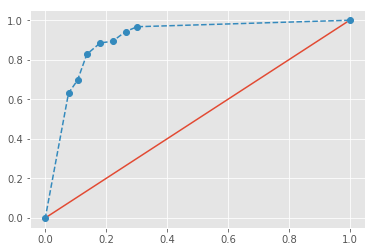

In [114]:
x = np.arange(0,1,0.01)
y = x
plt.plot(x,y)
plt.plot(esp,sens,marker="o",linestyle="--")


In [115]:
from sklearn import metrics
import ggplot as ggp
from ggplot import *

In [116]:
esp_,sen_,d = metrics.roc_curve(y_test,prob)

In [117]:
df = pd.DataFrame({
    "Especifidad":esp_,
    "Sensibilidad":sen_
})
df.head()

,Especifidad,Sensibilidad
0,0.000000,0.000000
1,0.000898,0.000000
2,0.002693,0.000000
3,0.002693,0.008197
4,0.003591,0.008197


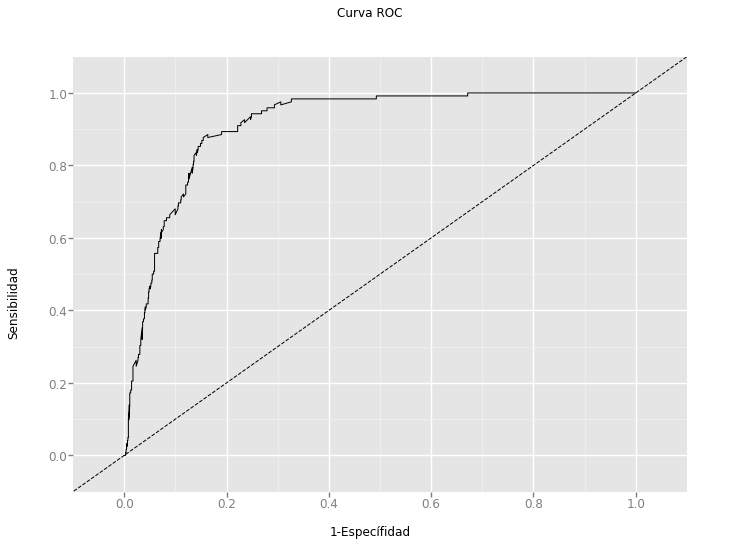

In [118]:
plotggpl = ggp.ggplot(df,aes(x="Especifidad",y="Sensibilidad"))+ggp.geom_line()+ggp.geom_abline(linetype="dashed")+xlim(-0.1,1.1)+ ggp.ylim(-.1,1.1)+ggp.xlab("1-Específidad")+ggp.ylab("Sensibilidad")+ggtitle("Curva ROC")
ggp.ggplot.show(plotggpl)

### Área bajo la curva

In [119]:
auc = metrics.auc(esp_,sen_)
#Compute Area Under the Curve (AUC) using the trapezoidal rule

In [120]:
auc

0.9131986343703093

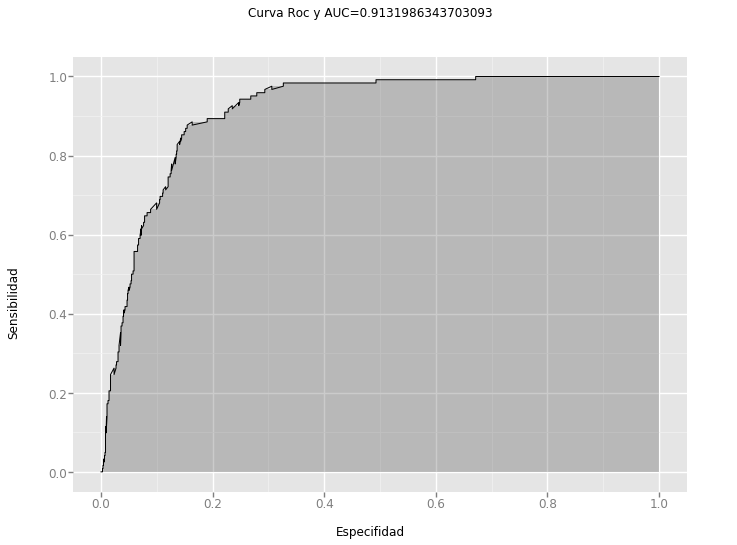

In [121]:
ggplot.show(ggplot(df, aes(x='Especifidad',y='Sensibilidad')) + geom_area(alpha=0.25)+geom_line(aes(y='Sensibilidad'))+ggtitle('Curva Roc y AUC=%s' % str(auc)))